In [1]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof

In [2]:
jan_2018_df = pd.read_csv("../Resources/Jan_2018.csv")
jan_2017_df = pd.read_csv("../Resources/Jan_2017.csv")
jan_2016_df = pd.read_csv("../Resources/Jan_2016.csv")
apr_2018_df = pd.read_csv("../Resources/Apr_2018.csv")
apr_2017_df = pd.read_csv("../Resources/Apr_2017.csv")
apr_2016_df = pd.read_csv("../Resources/Apr_2016.csv")
jul_2017_df = pd.read_csv("../Resources/July_2017.csv")
jul_2016_df = pd.read_csv("../Resources/July_2016.csv")
jul_2015_df = pd.read_csv("../Resources/July_2015.csv")
oct_2017_df = pd.read_csv("../Resources/Oct_2017.csv")
oct_2016_df = pd.read_csv("../Resources/Oct_2016.csv")
oct_2015_df = pd.read_csv("../Resources/Oct_2015.csv")

master_stats_df = jan_2018_df
master_stats_df = master_stats_df.append(jan_2017_df)
master_stats_df = master_stats_df.append(jan_2016_df)
master_stats_df = master_stats_df.append(apr_2018_df)
master_stats_df = master_stats_df.append(apr_2017_df)
master_stats_df = master_stats_df.append(apr_2016_df)
master_stats_df = master_stats_df.append(jul_2017_df)
master_stats_df = master_stats_df.append(jul_2016_df)
master_stats_df = master_stats_df.append(jul_2015_df)
master_stats_df = master_stats_df.append(oct_2017_df)
master_stats_df = master_stats_df.append(oct_2016_df)
master_stats_df = master_stats_df.append(oct_2015_df)

#master_stats_df = pd.read_csv("../Resources/Jan_2018.csv")
master_stats_df.fillna(value=0 , inplace=True)



unique_carrier_list = master_stats_df["UniqueCarrier"].unique()

Delay_df = master_stats_df[master_stats_df.DepDelayMinutes > 0]
beforetime_df = master_stats_df[master_stats_df.ArrDelay < 0]
cancelled_flights_df = master_stats_df[master_stats_df.Cancelled > 0]
diverted_flights_df = master_stats_df[master_stats_df.Diverted > 0]

master_stats_df.head()

C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saife\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, re

,ActualElapsedTime,AirTime,AirlineID,ArrDel15,ArrDelay,ArrDelayMinutes,ArrTime,ArrTimeBlk,ArrivalDelayGroups,CRSArrTime,...,TailNum,TaxiIn,TaxiOut,TotalAddGTime,UniqueCarrier,Unnamed: 109,WeatherDelay,WheelsOff,WheelsOn,Year
0,355.0,324.0,0.0,0.0,-24.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
1,350.0,327.0,0.0,0.0,-36.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
2,364.0,344.0,0.0,0.0,-17.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
3,345.0,325.0,0.0,0.0,-34.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018
4,356.0,334.0,0.0,0.0,-32.0,0.0,0.0,0001-0559,0.0,0.0,...,0,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018


In [63]:
master_stats_df.to_csv("../Resources/Master_Stats.csv")

In [3]:
#master_stats_df.dtypes

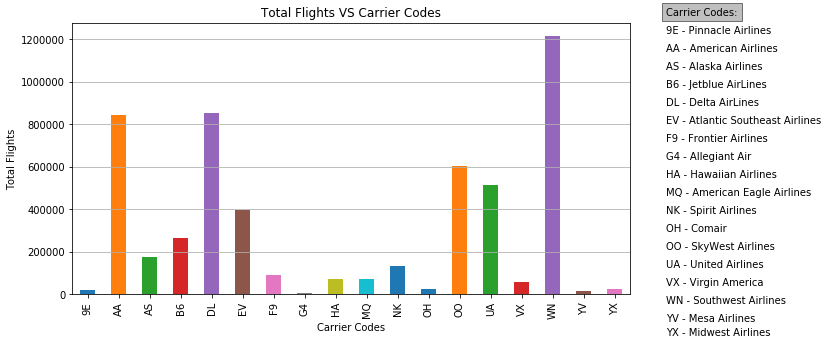

In [4]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_total_flights_df = carrier_group_df["Flights"].sum()
count_chart = carrier_total_flights_df.plot(kind='bar', figsize= (10,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Total Flights")

plt.title("Total Flights VS Carrier Codes")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()


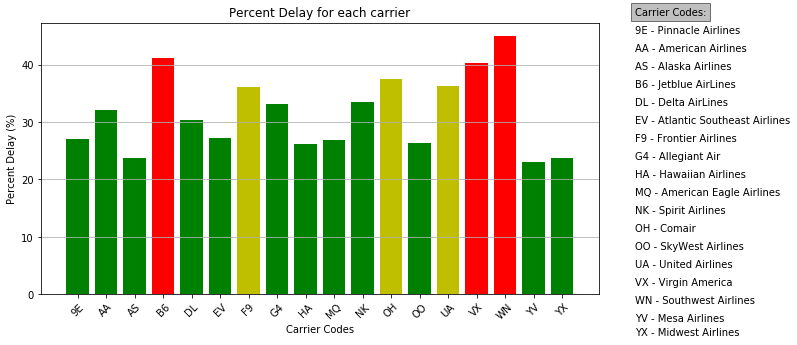

In [103]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_delay_group_df = Delay_df.groupby("UniqueCarrier")


carrier_delay_per  = []

carrier_delay_per = [carrier_delay_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

colors = ['r' if value >= 40 else 'y' if value >= 35 else 'g'  for value in carrier_delay_per]
plt.figure(figsize=(10,5))
plt.bar(unique_carrier_list,carrier_delay_per, color = colors)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)

plt.title("Percent Delay for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")

plt.show()
plt.tight_layout()
plt.show()

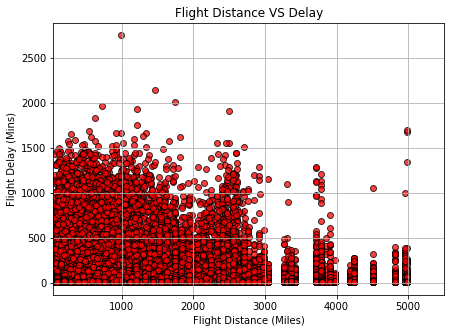

In [102]:
plt.figure(figsize=(7,5))
plt.scatter(Delay_df["Distance"], Delay_df["DepDelayMinutes"],marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title("Flight Distance VS Delay")
plt.xlabel("Flight Distance (Miles)")
plt.ylabel("Flight Delay (Mins)")
plt.xlim(50,5500)
plt.grid()
plt.show()

In [78]:
# weekdays_delay_df = Delay_df.groupby("DayOfWeek")
# weekdays_total_df = master_stats_df.groupby("DayOfWeek")

# weekday_delay_per  = []
# weekday_list = master_stats_df["DayOfWeek"].unique()
# tick_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

# weekday_delay_per = [weekdays_delay_df.get_group(day).size/weekdays_total_df.get_group(day).size* 100 for day in weekday_list]

# colors = ['r' if value >= 35 else 'b'  for value in weekday_delay_per]

# plt.bar(weekday_list,weekday_delay_per, color=colors)
# plt.xlabel("Days of week")
# plt.ylabel("Percent Delay (%)")
# plt.title("Percent Delay for days of a week")
# plt.grid(axis='y')
# plt.xticks(weekday_list, tick_labels)
# plt.ylim(0,50)
# plt.show()
# plt.tight_layout()
# plt.show()

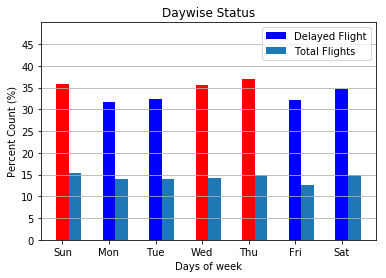

In [94]:
weekdays_delay_df = Delay_df.groupby("DayOfWeek")
weekdays_total_df = master_stats_df.groupby("DayOfWeek")

weekday_delay_per  = []
weekday_list = master_stats_df["DayOfWeek"].unique()
tick_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

weekday_delay_per = [weekdays_delay_df.get_group(day).size/weekdays_total_df.get_group(day).size* 100 for day in weekday_list]
weekday_flights_per = [weekdays_total_df.get_group(day).size/master_stats_df.size * 100 for day in weekday_list]

colors = ['r' if value >= 35 else 'b'  for value in weekday_delay_per]

width = 0.27
fig1 = plt.bar(weekday_list, weekday_delay_per , width, color=colors)
fig2 = plt.bar(weekday_list+0.27, weekday_flights_per, width)
plt.xlabel("Days of week")
plt.ylabel("Percent Count (%)")
plt.title("Daywise Status")
plt.grid(axis='y')
plt.xticks(weekday_list, tick_labels)
plt.yticks(np.arange(0, 50, 5))

plt.ylim(0,50)
plt.legend( (fig1[0], fig2[0]), ('Delayed Flight', 'Total Flights') )
plt.show()
plt.tight_layout()
plt.show()

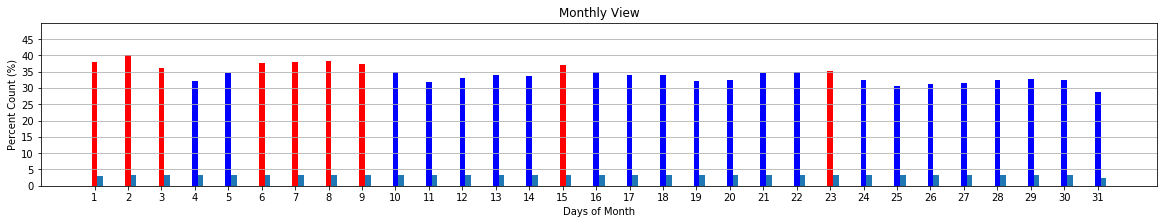

In [79]:
daily_delay_df = Delay_df.groupby("DayofMonth")
daily_total_df = master_stats_df.groupby("DayofMonth")

daily_delay_per  = []
daily_list = master_stats_df["DayofMonth"].unique()

daily_delay_per = [daily_delay_df.get_group(day).size/daily_total_df.get_group(day).size* 100 for day in daily_list]
daily_flights_per = [daily_total_df.get_group(day).size/master_stats_df.size * 100 for day in daily_list]

colors = ['r' if value >= 35 else 'b'  for value in daily_delay_per]
plt.figure(figsize=(20,3))

width = 0.17
fig1 = plt.bar(daily_list,daily_delay_per, width,color = colors)
fig2 = plt.bar(daily_list+width,daily_flights_per,width)
plt.xlabel("Days of Month")
plt.ylabel("Percent Count (%)")
plt.title("Monthly View")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(daily_list)
plt.yticks(major_ticks)
plt.yticks(minor_ticks)
plt.show()
plt.tight_layout()



In [ ]:
daily_delay_df = Delay_df.groupby("DayofMonth")
daily_total_df = master_stats_df.groupby("DayofMonth")

daily_delay_per  = []
daily_list = master_stats_df["DayofMonth"].unique()

daily_delay_per = [daily_delay_df.get_group(day).size/daily_total_df.get_group(day).size* 100 for day in daily_list]


colors = ['r' if value >= 35 else 'b'  for value in daily_delay_per]
plt.figure(figsize=(20,3))
plt.bar(daily_list,daily_delay_per, color = colors)
plt.xlabel("Days of Month")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Days of a Month")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(daily_list)
plt.show()
plt.tight_layout()
plt.figure(figsize=(20,30))


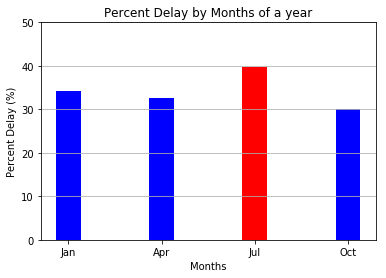

In [54]:
monthly_delay_df = Delay_df.groupby("Month")
monthly_total_df = master_stats_df.groupby("Month")

monthly_delay_per  = []
monthly_list = master_stats_df["Month"].unique()

monthly_delay_per = [monthly_delay_df.get_group(month).size/monthly_total_df.get_group(month).size* 100 for month in monthly_list]

colors = ['r' if value >= 35 else 'b'  for value in monthly_delay_per]
plt.bar(monthly_list,monthly_delay_per, color = colors)
plt.xlabel("Months")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Months of a year")
plt.grid(axis='y')
tick_labels = ["Jan","Apr","Jul","Oct"]
plt.ylim(0,50)
plt.xticks(monthly_list, tick_labels)
plt.show()
plt.tight_layout()



In [104]:
# yearly_delay_df = Delay_df.groupby("Year")
# yearly_total_df = master_stats_df.groupby("Year")

# yearly_delay_per  = []
# yearly_list = master_stats_df["Year"].unique()

# yearly_delay_per = [yearly_delay_df.get_group(year).size/yearly_total_df.get_group(year).size* 100 for year in yearly_list]


# plt.bar(yearly_list,yearly_delay_per)
# plt.xlabel("Years")
# plt.ylabel("Percent Delay (%)")
# plt.title("Percent Delay by Years")
# plt.grid(axis='y')
# plt.ylim(0,50)
# plt.xticks(yearly_list)

# plt.show()
# plt.tight_layout()


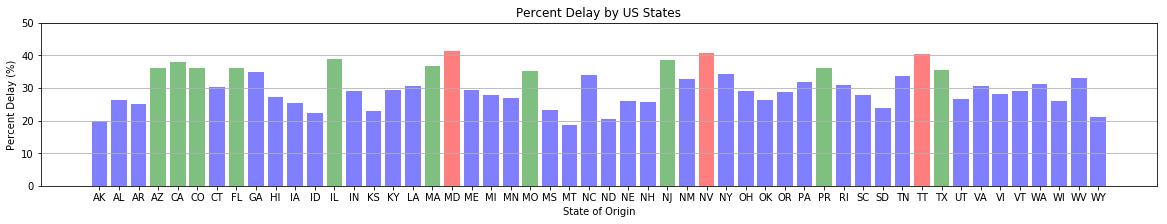

In [11]:
state_delay_df = Delay_df.groupby("OriginState")
state_total_df = master_stats_df.groupby("OriginState")

state_delay_per  = []
state_list = master_stats_df["OriginState"].unique()

state_delay_per = [state_delay_df.get_group(state).size/state_total_df.get_group(state).size* 100 for state in state_list]

colors = ['r' if value >= 40 else 'g' if value >= 35 else 'b'  for value in state_delay_per]

plt.figure(figsize=(20,3))
plt.bar(state_list,state_delay_per,color=colors, alpha=0.5, align="center")
plt.xlabel("State of Origin")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by US States")
plt.grid(axis='y')
plt.ylim(0,50)
plt.show()
plt.tight_layout()



Text(0.5,1,'Delay Reasons')

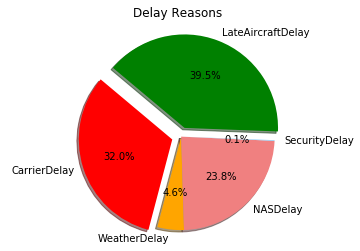

In [58]:
#http://aspmhelp.faa.gov/index.php/Types_of_Delay

labels = ["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]
delay_reasons_df = master_stats_df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
count = delay_reasons_df.sum()

explode = (0.1, 0, 0, 0, 0.1)

colors = ["red", "orange", "lightcoral", "lightskyblue","green"]

plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Delay Reasons")

In [14]:
# dep_timeblk_df = Delay_df.groupby("DepTimeBlk")["DepDelayMinutes"].sum()

# # Create a bar chart based off of the group series from before
# count_chart = dep_timeblk_df.plot(kind='bar', figsize= (15,5))

# # Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Departure Time")
# count_chart.set_ylabel("Total Delay (Mins)")

# plt.title("Total Delay (Mins) VS Departure Time")
# plt.grid(axis='y')
# plt.show()
# plt.tight_layout()

C:\Users\saife\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


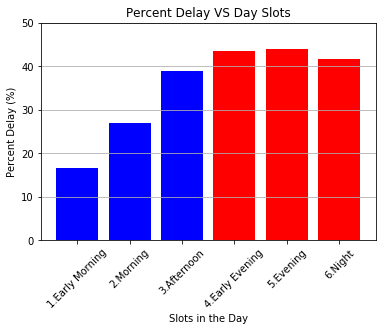

In [15]:
bins = [1, 659, 1159, 1559, 1859, 2059, 2359]

# Create the names for the bins
group_names = ["1.Early Morning","2.Morning","3.Afternoon","4.Early Evening","5.Evening","6.Night"]

time_slot_df = master_stats_df
time_slot_df["Day Slot"] = pd.cut(time_slot_df["CRSDepTime"], bins, labels=group_names)

time_slot_delay_df = Delay_df
time_slot_delay_df["Day Slot"] = pd.cut(time_slot_delay_df["CRSDepTime"], bins, labels=group_names)

time_slot_grouped_df = time_slot_df.groupby("Day Slot")
#time_slot_grouped_df.count()

time_slot_delay_grouped_df = time_slot_delay_df.groupby("Day Slot")
#time_slot_delay_grouped_df.count()

time_slot_per_delay = [time_slot_delay_grouped_df.get_group(slot).size/time_slot_grouped_df.get_group(slot).size * 100 for slot in group_names]


colors = ['r' if value >= 40 else 'b'  for value in time_slot_per_delay]
plt.bar(group_names,time_slot_per_delay, color=colors)
plt.xlabel("Slots in the Day")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)
plt.ylim (0,50)

plt.title("Percent Delay VS Day Slots")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with driver count per city.")

plt.show()

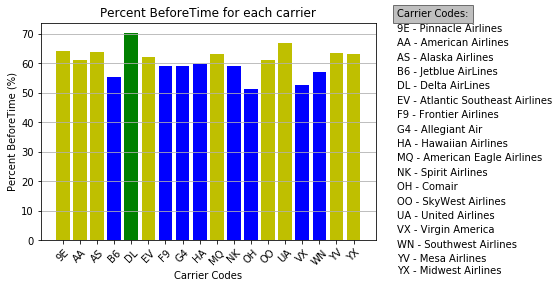

In [101]:
carrier_beforetime_group_df = beforetime_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

carrier_bt_per  = []

carrier_bt_per = [carrier_beforetime_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

colors = ['g' if value >= 70 else 'y' if value >= 60 else "b"  for value in carrier_bt_per]

plt.bar(unique_carrier_list,carrier_bt_per, color = colors)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()
plt.show()

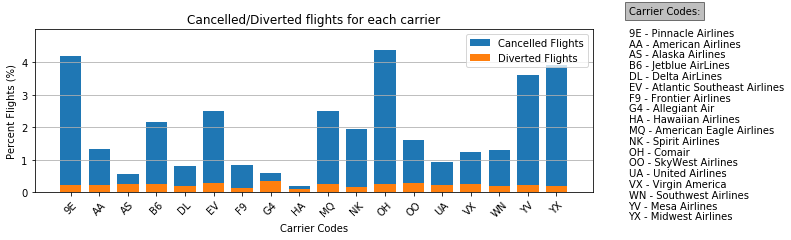

In [97]:
carrier_cancelled_group_df = cancelled_flights_df.groupby("UniqueCarrier")

carrier_cancelled_per = [carrier_cancelled_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

carrier_diverted_group_df = diverted_flights_df.groupby("UniqueCarrier")

carrier_diverted_per = [carrier_diverted_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

width = 0.75

plt.figure(figsize=(10,3))
fig1 = plt.bar(unique_carrier_list,carrier_cancelled_per, width)
fig2 = plt.bar(unique_carrier_list,carrier_diverted_per, width)

plt.xlabel("Carrier Codes")
plt.ylabel("Percent Flights (%)")
plt.xticks(rotation = 45)
plt.yticks(major_ticks)
plt.yticks(minor_ticks)
plt.title("Cancelled/Diverted flights for each carrier")
plt.grid(axis='y')
plt.legend( (fig1[0], fig2[0]), ('Cancelled Flights', 'Diverted Flights') )
plt.ylim(0,5)
plt.yticks(np.arange(0, 5, 1))
plt.figtext(0.95,0.95, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()



Text(1,0.65,'Circle size correlates with Delay Duration for each Carrier')

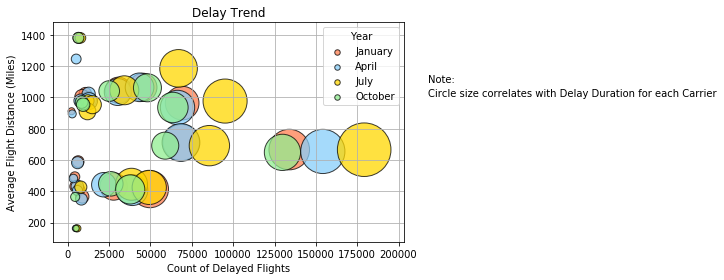

In [81]:
## Obtain the x and y coordinates for each of the three city types

#Grouping the merged dataset by Months - Urban, Suburban, Rural
year_grouped_df = Delay_df.groupby(["Month"])

# #Grouping the Urban cities further by individual city
jan_grouped = year_grouped_df.get_group(1).groupby("UniqueCarrier")

#Grouping the Suburban cities further by individual city
apr_grouped = year_grouped_df.get_group(4).groupby("UniqueCarrier")

#Grouping the Rural cities further by individual city
july_grouped = year_grouped_df.get_group(7).groupby("UniqueCarrier")

oct_grouped = year_grouped_df.get_group(10).groupby("UniqueCarrier")

#Finding the Average Fare, Total Rides and Driver Count for Urban cities

jan_flight_Distance = jan_grouped["Distance"].median()
jan_delay_count = jan_grouped["Flights"].size()
jan_delay_minutes = jan_grouped["DepDelayMinutes"].sum()

#Finding the Average Fare, Total Rides and Driver Count for Suburban cities
apr_flight_Distance = apr_grouped["Distance"].median()
apr_delay_count = apr_grouped["Flights"].size()
apr_delay_minutes = apr_grouped["DepDelayMinutes"].sum()

#Finding the Average Fare, Total Rides and Driver Count for Rural cities
july_flight_Distance = july_grouped["Distance"].median()
july_delay_count = july_grouped["Flights"].size()
july_delay_minutes = july_grouped["DepDelayMinutes"].sum()

oct_flight_Distance = oct_grouped["Distance"].median()
oct_delay_count = oct_grouped["Flights"].size()
oct_delay_minutes = oct_grouped["DepDelayMinutes"].sum()

# Build the scatter plots for each city types
plt.scatter(jan_delay_count, jan_flight_Distance, marker="o", s=jan_delay_minutes/2000, facecolors = 'coral' , edgecolors="black", alpha=0.75, label="January")
plt.scatter(apr_delay_count, apr_flight_Distance, marker="o", s=apr_delay_minutes/2000, facecolors = 'lightskyblue' , edgecolors="black", alpha=0.75, label="April")
plt.scatter(july_delay_count, july_flight_Distance, marker="o", s=july_delay_minutes/2000, facecolors= 'gold' , edgecolors="black", alpha=0.75, label="July")
plt.scatter(oct_delay_count, oct_flight_Distance, marker="o", s=oct_delay_minutes/2000, facecolors= 'lightgreen' , edgecolors="black", alpha=0.75, label="October")


# Incorporate the other graph properties
plt.title("Delay Trend")
plt.xlabel("Count of Delayed Flights")
plt.ylabel("Average Flight Distance (Miles)")
plt.tight_layout()
plt.grid()

# Create a legend
legend = plt.legend(loc = "best",title = "Year")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with Delay Duration for each Carrier")

# # Save Figure
# # plt.savefig("../Images/PyberAnalysis.png")